# Rating Problem: Grant or not, bank loans to clients. (DNN)

### Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

### Reading data

In [3]:
filename='bank-additional-full2.csv'
data = pd.read_csv(filename, delimiter=';')

In [4]:
for col in data.columns:
    print(col, end=" , ")

age , job , marital , education , default , housing , loan , contact , month , day_of_week , duration , campaign , pdays , previous , poutcome , emp.var.rate , cons.price.idx , cons.conf.idx , euribor3m , nr.employed , y , 

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.0


# Attributes:

* 1 - age: age (numeric)
* 2 - job: type of job (categorical: 'admin', 'blue collar', 'entrepreneur', 'maid', 'management', 'retired' 'technical', 'unemployed', 'unknown')
* 3 - marital: civil status (categorical: 'divorced', 'married', 'single', 'unknown', note: 'divorced' means divorced or widowed)
* 4 - education: education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional', 'university', 'unknown')
* 5 - default: default: credit default? (categorical: 'no', 'yes', 'unknown')
* 6 - housing: had mortgage loan? (categorical: 'no', 'yes', 'unknown')
* 7 - loan: did you have another loan? (categorical: 'no', 'yes', 'unknown')

** Related to the last contact of the current campaign: **
* 8 - contact: contact, type of contact communication (categorical: 'cellular', 'telephone')
* 9 - month: months, last contact month of the year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* 10 - day_of_week: days of the week, the last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
* 11 - duration: duration, last duration of the contact, in seconds (numeric). Important Note: This attribute greatly affects the output target (for example, if duration = 0 then y = 'no'). However, the duration is not known before a call is made. In addition, after the end of the call, obviously, is known. Thus, this input should only be included for reference purposes and should be discarded if the intention is to have a realistic predictive model.

** Other attributes: **
* 12 - campaign: number of contacts made during this campaign and for this client (numeric, includes last contact)
* 13 - pdays: days, number of days that passed after the last customer contact in a previous campaign (numeric, 999 means the customer was not contacted previously)
* 14 - previous: previous, number of contacts made before this campaign and for this client (numeric)
* 15 - poutcome: result of previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

** Attributes of social and economic context **
* 16 - emp.var.rate: employment rate of change - quarterly indicator (numeric)
* 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
* 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* 19 - euribor3m: Euribor 3 month rate - daily indicator (numeric)
* 20 - nr.employed: number of employees - quarterly (numeric)

### Auxiliary functions when required

In [6]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os

# Encoding of text values for nominal variables
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)


# Encoding of text values for indexes (ie [1], [2], [3] for red, green, blue for example).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

# Converts a Pandas dataframe to the x, y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # Finds the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if hasattr(target_type, '__iter__') else target_type
    # Encoding for int. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df.as_matrix(result).astype(np.float32), dummies.as_matrix().astype(np.float32)
    else:
        # Regression
        return df.as_matrix(result).astype(np.float32), df.as_matrix([target]).astype(np.float32)


### Pre-processing attributes

### Selection of categorical and real attributes

In [7]:
categorical = ['job', 'marital', 'education']
real        = ['age']
Y           = ['y']
atributes   = real + categorical + Y
df = data[atributes].copy()
df.head()

,age,job,marital,education,y
0,56.0,housemaid,married,basic.4y,0.0
1,57.0,services,married,high.school,0.0
2,37.0,services,married,high.school,0.0
3,40.0,admin.,married,basic.6y,0.0
4,56.0,services,married,high.school,0.0


In [8]:
job = encode_text_index(df,"job")
marital = encode_text_index(df,"marital")
education = encode_text_index(df,"education")

In [9]:
Y = encode_text_index(df,"y")

In [10]:
encode_text_dummy(df,'job')
encode_text_dummy(df,'marital')
encode_text_dummy(df,'education')

In [11]:
df.head()

,age,y,job-0,job-1,job-2,job-3,job-4,job-5,job-6,job-7,...,marital-2,marital-3,education-0,education-1,education-2,education-3,education-4,education-5,education-6,education-7
0,56.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,57.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,37.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,40.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,56.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [12]:
x, y = to_xy(df,'y')

In [13]:
x

array([[ 56.,   0.,   0., ...,   0.,   0.,   0.],
       [ 57.,   0.,   0., ...,   0.,   0.,   0.],
       [ 37.,   0.,   0., ...,   0.,   0.,   0.],
       ..., 
       [ 37.,   1.,   0., ...,   0.,   1.,   0.],
       [ 73.,   0.,   0., ...,   1.,   0.,   0.],
       [ 44.,   0.,   0., ...,   1.,   0.,   0.]], dtype=float32)

### Training and Test Split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) 

### Creating the Model

In [15]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping

# Rede Neural
model = Sequential()
model.add(Dense(256, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, kernel_initializer='normal', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16, kernel_initializer='normal', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1],activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=2, mode='auto')
model.fit(x,y,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=50)

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               6656      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                2064      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 34        
Total para

In [22]:
from sklearn import metrics

# Accuracy
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_compare = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_compare, pred)
print("Final Accuracy: {}".format(score))

Final Accuracy: 0.6711206896551725


### Confusion Matrix Plot

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('Observed Label')
    plt.xlabel('Predicted Label')

Confusion Matrix
[[893 266]
 [497 664]]


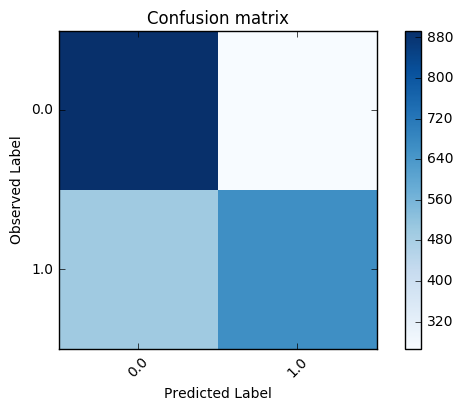

In [24]:
# Confusion matrix
cm = confusion_matrix(y_compare, pred)
np.set_printoptions(precision=2)
print('Confusion Matrix')
print(cm)
plt.figure()
plot_confusion_matrix(cm,Y)


Normalized Confusion Matrix
[[ 0.77  0.23]
 [ 0.43  0.57]]


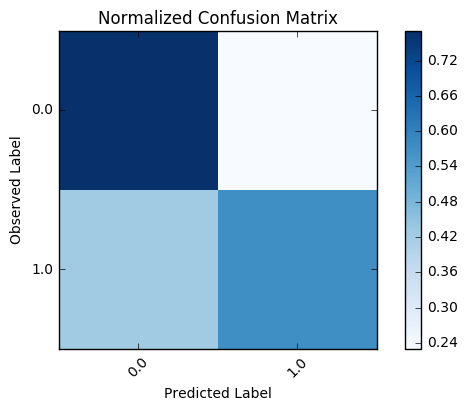

In [25]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized Confusion Matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, Y, title='Normalized Confusion Matrix')

plt.show()

### ROC curve Plot

In [26]:
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label = 'ROC Curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('Real Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

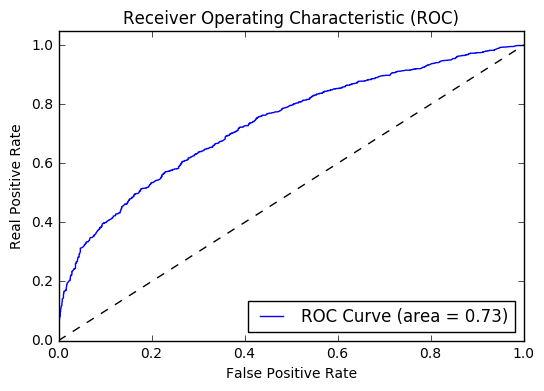

In [27]:
pred = model.predict(x_test)
pred = pred[:,1] # only positives case
plot_roc(pred,y_compare)